In [50]:
# 10 Steps Quickstart guide for timeseries data pro 

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns

from datetime import *
import datetime as dt
from pytz import timezone

In [52]:
df1=pd.read_csv('medals.csv')
# df1.columns='time', 'France', 'United States'

In [53]:
df1.head()

,Year,France,United States
0,1896,12,21
1,1900,24,91
2,1904,1,149
3,1906,23,66
4,1908,35,143


# create datetime object

In [54]:
start_time=datetime(2020,9,14,2,0,0)
start_time

datetime.datetime(2020, 9, 14, 2, 0)

In [55]:

df1.Year=pd.to_datetime(df1.Year, format = "%Y")  #key Learning otherwise will format to 1970--
df1.head()

,Year,France,United States
0,1896-01-01,12,21
1,1900-01-01,24,91
2,1904-01-01,1,149
3,1906-01-01,23,66
4,1908-01-01,35,143


In [56]:
df2=df1.set_index('Year')
df2.head()

,France,United States
Year,,
1896-01-01,12,21
1900-01-01,24,91
1904-01-01,1,149
1906-01-01,23,66
1908-01-01,35,143


# set datetime index

In [57]:
df1.set_index(pd.DatetimeIndex(df1.Year), inplace=True)

In [58]:
df1.head()

,Year,France,United States
Year,,,
1896-01-01,1896-01-01,12,21
1900-01-01,1900-01-01,24,91
1904-01-01,1904-01-01,1,149
1906-01-01,1906-01-01,23,66
1908-01-01,1908-01-01,35,143


# plot time Series

<AxesSubplot:xlabel='Year'>

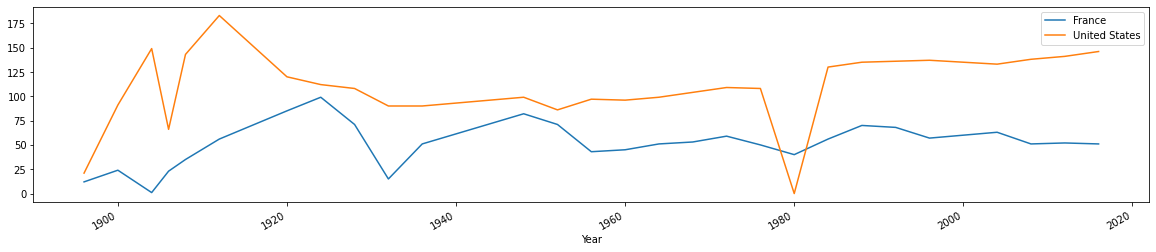

In [59]:
df1[['France', 'United States']].plot( figsize=(20,4))

# slicing time series

<AxesSubplot:xlabel='Year'>

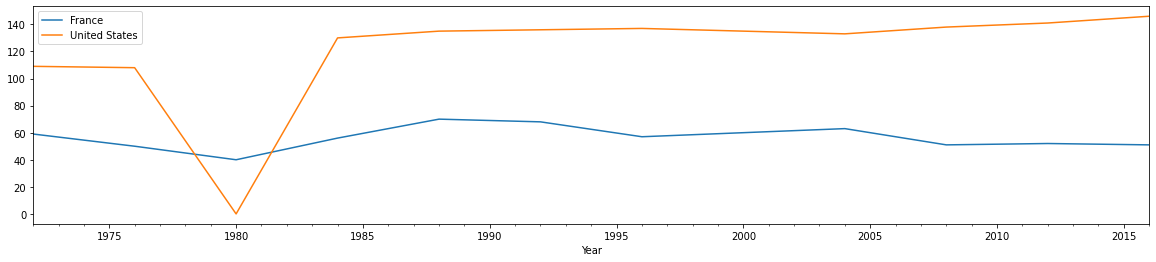

In [60]:
df1[['France', 'United States']]['1970':].plot( figsize=(20,4))

In [15]:
df1.resample("3Y").nearest(limit=1).head(3)

,Year,France,United States
Year,,,
1896-12-31,1896-01-01,12.0,21.0
1899-12-31,1900-01-01,24.0,91.0
1902-12-31,1904-01-01,1.0,149.0


# resample using nearest upscale and down scale data and may lose some details

<AxesSubplot:xlabel='Year'>

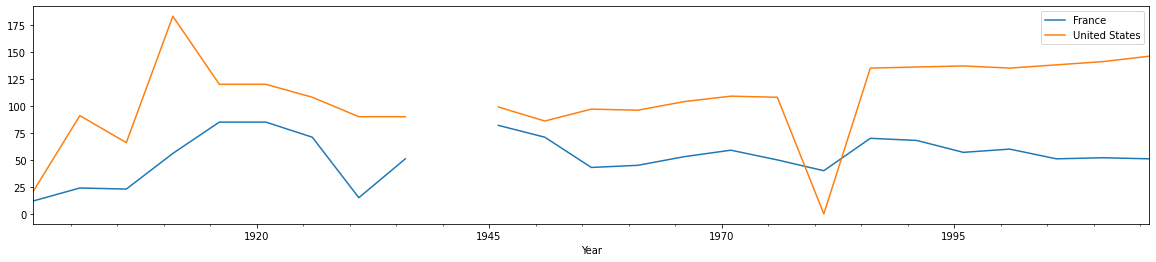

In [61]:
df1.resample("5Y").nearest(limit=1)[['France', 'United States']].plot( figsize=(20,4))

In [65]:
df1.resample("5Y").nearest(limit=1).head(10)

,Year,France,United States
Year,,,
1896-12-31,1896-01-01,12.0,21.0
1901-12-31,1900-01-01,24.0,91.0
1906-12-31,1906-01-01,23.0,66.0
1911-12-31,1912-01-01,56.0,183.0
1916-12-31,1920-01-01,85.0,120.0
1921-12-31,1920-01-01,85.0,120.0
1926-12-31,1928-01-01,71.0,108.0
1931-12-31,1932-01-01,15.0,90.0
1936-12-31,1936-01-01,51.0,90.0


In [66]:
df1.head(10)

,Year,France,United States
Year,,,
1896-01-01,1896-01-01,12,21
1900-01-01,1900-01-01,24,91
1904-01-01,1904-01-01,1,149
1906-01-01,1906-01-01,23,66
1908-01-01,1908-01-01,35,143
1912-01-01,1912-01-01,56,183
1920-01-01,1920-01-01,85,120
1924-01-01,1924-01-01,99,112
1928-01-01,1928-01-01,71,108


# rolling average

<AxesSubplot:title={'center':'rolling on 10 '}, xlabel='Year'>

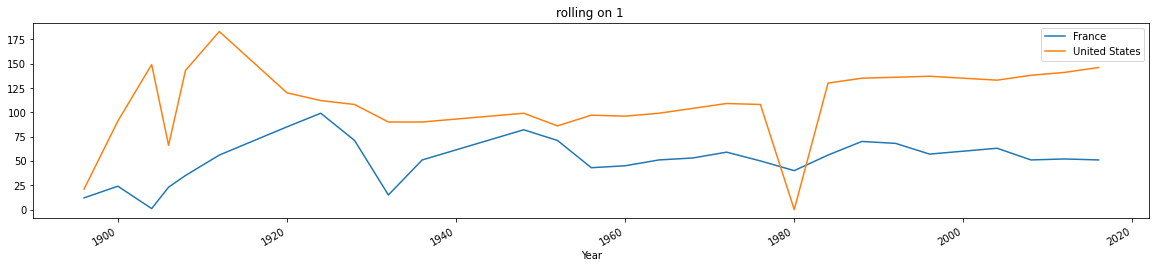

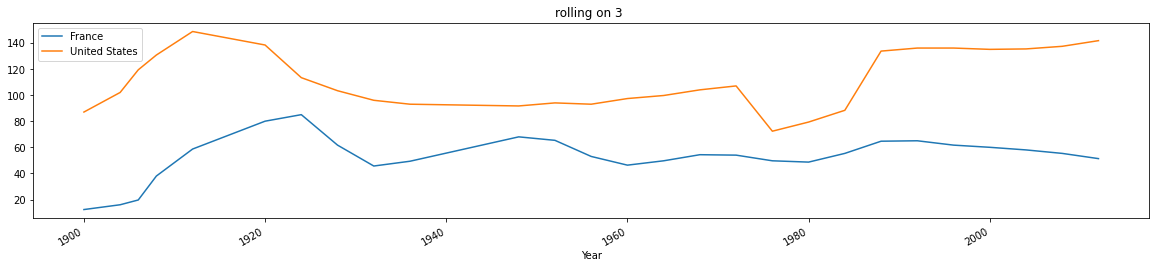

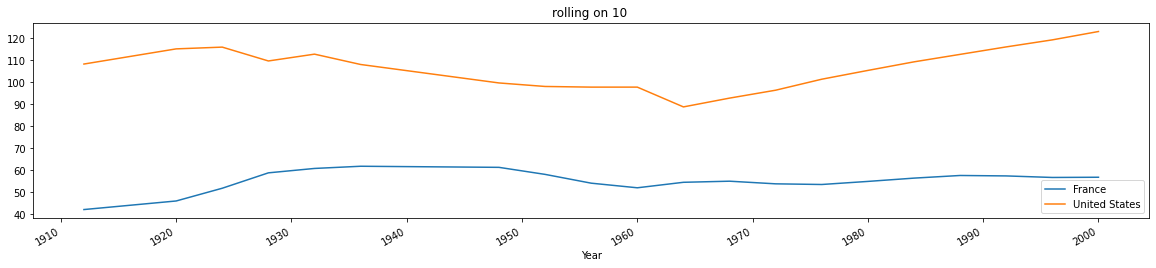

In [81]:
df1.rolling(1, center=True).mean()[['France', 'United States']].plot( title='rolling on 1 ', figsize=(20,4))
df1.rolling(3, center=True).mean()[['France', 'United States']].plot( title='rolling on 3 ', figsize=(20,4))
df1.rolling(10, center=True).mean()[['France', 'United States']].plot( title='rolling on 10 ', figsize=(20,4))

In [68]:
df1.rolling(5, center=True).mean().head(10)

,France,United States
Year,,
1896-01-01,NaN,NaN
1900-01-01,12.333333,87.000000
1904-01-01,16.000000,102.000000
1906-01-01,19.666667,119.333333
1908-01-01,38.000000,130.666667
1912-01-01,58.666667,148.666667
1920-01-01,80.000000,138.333333
1924-01-01,85.000000,113.333333
1928-01-01,61.666667,103.333333


# cumulative 

In [95]:
df1.rolling(3, center=True).mean().cumsum(axis=0, skipna=True)[['France', 'United States']]

,France,United States
Year,,
1896-01-01,NaN,NaN
1900-01-01,12.333333,87.000000
1904-01-01,28.333333,189.000000
1906-01-01,48.000000,308.333333
1908-01-01,86.000000,439.000000
1912-01-01,144.666667,587.666667
1920-01-01,224.666667,726.000000
1924-01-01,309.666667,839.333333
1928-01-01,371.333333,942.666667


<AxesSubplot:title={'center':'cumulative vs. rolling average '}, xlabel='Year'>

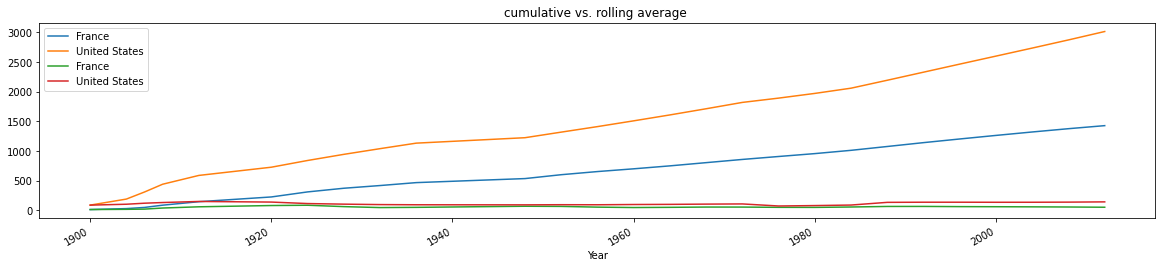

In [96]:

ax1=df1.rolling(3, center=True).mean().cumsum(axis=0, skipna=True)[['France', 'United States']].plot( title='rolling on 3 ', figsize=(20,4))

df1.rolling(3, center=True).mean()[['France', 'United States']].plot( title='cumulative vs. rolling average ', figsize=(20,4), ax=ax1)

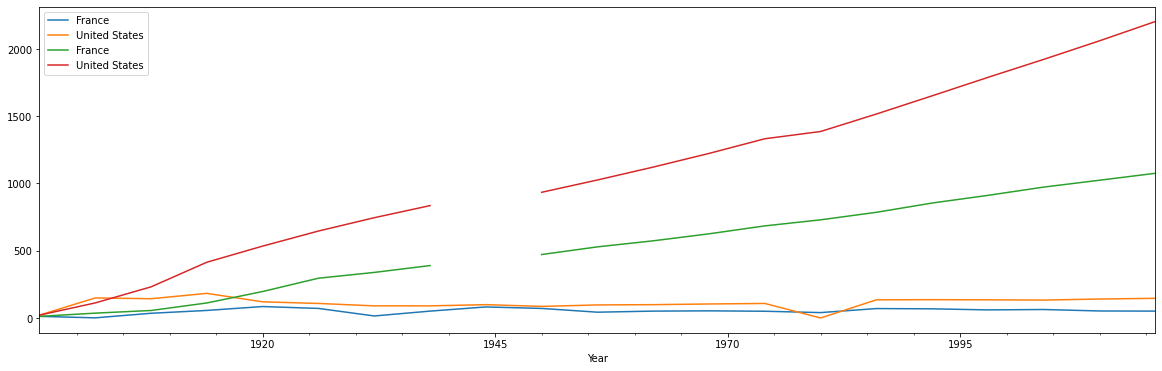

In [97]:
ax1=df1.resample("6Y").nearest(limit=1)[['France', 'United States']].plot( figsize=(20,4))
df1_cumsum=df1.resample('6Y').mean().cumsum(axis=0, skipna=True).plot(figsize=(20,6), ax=ax1)

# Melt to rearrange table

In [108]:
df2=df1.melt(id_vars=['Year'], value_vars=['France', 'United States'])
# print(df2.head())
# print(df2.tail())
df2
# df.melt(id_vars=['A'], value_vars=['B', 'C'])

,Year,variable,value
0,1896-01-01,France,12
1,1900-01-01,France,24
2,1904-01-01,France,1
3,1906-01-01,France,23
4,1908-01-01,France,35
5,1912-01-01,France,56
6,1920-01-01,France,85
7,1924-01-01,France,99
8,1928-01-01,France,71
9,1932-01-01,France,15


In [24]:
df2.columns=['Year','Country','Medals']

In [25]:
df2.head(1)

,Year,Country,Medals
0,1896-01-01,France,12


# group by to arrange tables

In [26]:
df2_by_country=df2.groupby('Country').agg(
   { 'Country': 'first',
    'Year':'first',
    'Medals': 'sum'}
)
df2_by_country

,Country,Year,Medals
Country,,,
France,France,1896-01-01,1494
United States,United States,1896-01-01,3202


In [27]:
df2_by_country=df2.groupby(['Country', 'Year']).agg(
   { 'Country': 'first',
    'Year':'first',
    'Medals': 'sum'}
)
df2_by_country.sample(5)

Country       Year  Medals
Country       Year                                        
France        1980-01-01         France 1980-01-01      40
              1956-01-01         France 1956-01-01      43
              1924-01-01         France 1924-01-01      99
United States 1900-01-01  United States 1900-01-01      91
France        1952-01-01         France 1952-01-01      71

In [116]:
df2.columns=['Year', 'Country', 'Medals']
df2

,Year,Country,Medals
0,1896-01-01,France,12
1,1900-01-01,France,24
2,1904-01-01,France,1
3,1906-01-01,France,23
4,1908-01-01,France,35
5,1912-01-01,France,56
6,1920-01-01,France,85
7,1924-01-01,France,99
8,1928-01-01,France,71
9,1932-01-01,France,15


# Pivot tables for time 

In [117]:
pivot=pd.pivot_table(df2, values='Medals',
                     index='Year',
                     columns='Country'
                    )
pivot.head()

Country,France,United States
Year,,
1896-01-01,12,21
1900-01-01,24,91
1904-01-01,1,149
1906-01-01,23,66
1908-01-01,35,143
